In [33]:
import pandas as pd

from sklearn import linear_model
import  matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("data/movies.csv")
print(df)

                              franquicia  presupuesto  genero  \
0         Father of the Bride Collection          NaN  Comedy   
1                                    NaN          NaN   Drama   
2                      Friday Collection    3500000.0  Comedy   
3                                    NaN          NaN  Comedy   
4                                    NaN   12000000.0  Comedy   
...                                  ...          ...     ...   
1344     The Ouija Experiment Collection          NaN  Horror   
1345                                 NaN          NaN     NaN   
1346                                 NaN          NaN     NaN   
1347  Texas Chainsaw Massacre Collection          NaN  Horror   
1348                                 NaN          NaN     NaN   

                                         pagina_web    imdb_id lenguaje  \
0                                               NaN  tt0113041       en   
1                                               NaN  tt0112749       

In [47]:
print(df.columns)

Index(['presupuesto', 'popularidad', 'ventas', 'duracion', 'puntuacion',
       'n_votos', 'ventas_pred'],
      dtype='object')


presupuesto - dinero inicial para realizar la producción de tipo float
popularidad - veces que se ha hablado de la pelicula, tipo float
ventas - dinero que ha generado
duracion - tiempo de la película
puntuacion - valoranción de los usuarios
n_votos - personas que han votado
ventas_pred - predicciónes de ventas

In [35]:
df = df.select_dtypes(include=['float64', 'int64'])
df

,presupuesto,popularidad,ventas,duracion,puntuacion,n_votos
0,NaN,8.387519,76578911.0,106.0,5.7,173.0
1,NaN,0.894647,676525.0,106.0,6.7,13.0
2,3500000.0,14.569650,28215918.0,91.0,7.0,513.0
3,NaN,8.963037,32.0,87.0,6.0,124.0
4,12000000.0,9.592265,41205099.0,92.0,6.5,767.0
...,...,...,...,...,...,...
1344,NaN,1.642247,NaN,86.0,3.0,25.0
1345,NaN,0.352816,NaN,11.0,5.5,2.0
1346,NaN,0.110588,NaN,86.0,5.7,3.0
1347,NaN,9.742082,NaN,90.0,5.7,62.0


In [36]:
print(df.isnull().sum())

presupuesto    591
popularidad      0
ventas         141
duracion         8
puntuacion       0
n_votos          0
dtype: int64


In [37]:
df = df.select_dtypes(include=['float64', 'int64']).fillna(0)
df

,presupuesto,popularidad,ventas,duracion,puntuacion,n_votos
0,0.0,8.387519,76578911.0,106.0,5.7,173.0
1,0.0,0.894647,676525.0,106.0,6.7,13.0
2,3500000.0,14.569650,28215918.0,91.0,7.0,513.0
3,0.0,8.963037,32.0,87.0,6.0,124.0
4,12000000.0,9.592265,41205099.0,92.0,6.5,767.0
...,...,...,...,...,...,...
1344,0.0,1.642247,0.0,86.0,3.0,25.0
1345,0.0,0.352816,0.0,11.0,5.5,2.0
1346,0.0,0.110588,0.0,86.0,5.7,3.0
1347,0.0,9.742082,0.0,90.0,5.7,62.0


In [38]:
reg = linear_model.LinearRegression()

In [39]:
reg.fit(df.drop("ventas", axis="columns"), df.ventas)

LinearRegression()

In [40]:
print("Intercept",reg.intercept_)
print("coef",reg.coef_)

Intercept -3795284.455620259
coef [ 1.22671818e+00 -2.86498152e+05  4.72544841e+04  5.48802981e+05
  6.68634838e+04]


In [41]:
df["ventas_pred"] = reg.predict(df.drop("ventas", axis="columns"))

In [42]:
# Comparar las ventas reales
print(df[["ventas", "ventas_pred"]])

          ventas   ventas_pred
0     76578911.0  1.350624e+07
1       676525.0  5.503581e+06
2     28215918.0  3.876680e+07
3           32.0  9.331852e+06
4     41205099.0  6.737609e+07
...          ...           ...
1344         0.0  3.116096e+06
1345         0.0 -2.244229e+05
1346         0.0  3.565685e+06
1347         0.0  4.940244e+06
1348         0.0 -4.705404e+05

[1349 rows x 2 columns]


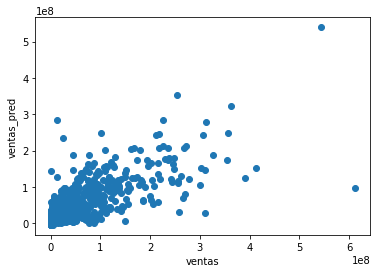

In [43]:
plt.scatter(df.ventas, df.ventas_pred)
plt.xlabel("ventas")
plt.ylabel("ventas_pred")
plt.show()

In [46]:
df.to_csv("data/movies_pred.csv", index=False)